In [1]:
import numpy as np
import pandas as pd

In [2]:
Xd=pd.read_csv('./SurveyAnswers.csv')
Xd

,CDR_name,commercial,opensource,rest_api,another_api,gui,api_n,gui_n,aql,sql,json_xml,flat_struct,opt_wt,openehrextr_fhir,add_openehr,add_others
0,ehrbase,n,y,y,y,y,4.00,0,y,n,2,2,2,1,1,1
1,better,y,n,y,y,y,4.00,3,y,n,2,2,2,1,2,4
2,base24,y,n,y,y,y,4.00,4,n,n,2,0,1,1,1,2
3,cabo,n,y,y,y,y,2.91,3,n,n,2,0,1,1,0,0
4,arenaehr,y,n,y,n,y,4.00,0,y,n,2,1,2,1,2,2
5,eweave,y,n,n,n,y,0.00,3,y,y,0,0,0,0,1,2
6,ehrcare,y,n,y,y,n,3.33,0,y,n,1,1,1,0,1,1
7,clever,y,n,y,y,y,4.00,3,n,y,0,1,1,1,2,3
8,ehrdb,y,n,y,y,y,4.00,3,y,n,2,2,1,1,1,3
9,rhp,y,n,y,y,y,4.00,3,n,y,0,1,1,0,2,4


In [3]:
Xd.shape
Xd.drop(['CDR_name'],axis=1,inplace=True)
Xd.drop(['commercial','opensource'],axis=1,inplace=True)
print(Xd.shape)
Xd['gui_n']=Xd['gui_n'].astype(float)
Xd['json_xml']=Xd['json_xml'].astype(float)
Xd['flat_struct']=Xd['flat_struct'].astype(float)
Xd['opt_wt']=Xd['opt_wt'].astype(float)
Xd['openehrextr_fhir']=Xd['openehrextr_fhir'].astype(float)
Xd['add_openehr']=Xd['add_openehr'].astype(float)
Xd['add_others']=Xd['add_others'].astype(float)

(11, 13)


In [4]:
a=[True for a in range(13)]
cat_features=np.asarray(a)
print (len(cat_features))

13


In [5]:
weightl=[1]*13
weight=np.asarray(weightl)
print(len(weight))
print(len(cat_features))

13
13


In [6]:
import gower

#dm=gower.gower_matrix(Xd)
dm=gower.gower_matrix(Xd,weight=weight,cat_features=cat_features)
dm


array([[0.        , 0.23076923, 0.3846154 , 0.53846157, 0.30769232,
        0.7692308 , 0.46153846, 0.61538464, 0.23076923, 0.6923077 ,
        0.61538464],
       [0.23076923, 0.        , 0.46153846, 0.46153846, 0.30769232,
        0.7692308 , 0.6923077 , 0.46153846, 0.23076923, 0.46153846,
        0.6923077 ],
       [0.3846154 , 0.46153846, 0.        , 0.30769232, 0.46153846,
        0.6923077 , 0.61538464, 0.46153846, 0.30769232, 0.53846157,
        0.6923077 ],
       [0.53846157, 0.46153846, 0.30769232, 0.        , 0.61538464,
        0.7692308 , 0.6923077 , 0.46153846, 0.3846154 , 0.53846157,
        0.61538464],
       [0.30769232, 0.30769232, 0.46153846, 0.61538464, 0.        ,
        0.6923077 , 0.61538464, 0.53846157, 0.46153846, 0.61538464,
        0.53846157],
       [0.7692308 , 0.7692308 , 0.6923077 , 0.7692308 , 0.6923077 ,
        0.        , 0.7692308 , 0.6923077 , 0.6923077 , 0.61538464,
        0.61538464],
       [0.46153846, 0.6923077 , 0.61538464, 0.6923077 , 0.

In [7]:
gower.gower_topn(Xd.iloc[0:1,:], Xd, n = 5)

{'index': array([0, 8, 1, 4, 6]),
 'values': array([0.        , 0.13461539, 0.15384616, 0.17307693, 0.28211537],
       dtype=float32)}

In [8]:
from scipy.spatial.distance import squareform
#sdm=squareform(dm,force='tovector') 
sdm=squareform(dm) 

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#dm = gower.gower_matrix(X)
#Zd = linkage(sdm,method='single') 
#Zd = linkage(sdm,method='complete',optimal_ordering=True) 
Zd = linkage(sdm,method='weighted',optimal_ordering=True) 
#Zd = linkage(sdm,method='average') 

In [10]:
cld = fcluster(Zd, 4, criterion='maxclust')
cld

array([1, 1, 1, 1, 1, 4, 3, 2, 1, 2, 2], dtype=int32)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [42.5, 42.5, 65.0, 65.0],
  [20.0, 20.0, 53.75, 53.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [36.875, 36.875, 82.5, 82.5],
  [59.6875, 59.6875, 105.0, 105.0],
  [5.0, 5.0, 82.34375, 82.34375]],
 'dcoord': [[0.0, 0.3076923191547394, 0.3076923191547394, 0.0],
  [0.0, 0.23076923191547394, 0.23076923191547394, 0.0],
  [0.0, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394],
  [0.23076923191547394, 0.38461539149284363, 0.38461539149284363, 0.0],
  [0.3076923191547394,
   0.47115385718643665,
   0.47115385718643665,
   0.38461539149284363],
  [0.0, 0.1538461595773697, 0.1538461595773697, 0.0],
  [0.0, 0.5000000149011612, 0.5000000149011612, 0.1538461595773697],
  [0.47115385718643665,
   0.5709134815260768,
   0.5709134815260768,
   0.5000000149011612],
  [0.5709134815260768, 0.627403867430985, 0.627403867430985, 0.0],
  [0.0, 0.7235577087849379, 0.723557708784937

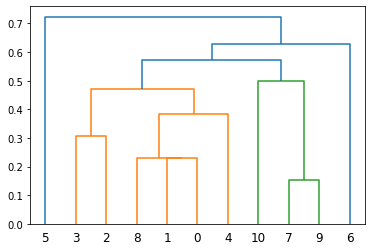

In [11]:
dendrogram(Zd) 

In [12]:
#pam or medoids
from sklearn_extra.cluster import KMedoids

In [13]:
km=KMedoids(n_clusters=2, metric='precomputed', max_iter=30000, random_state=None)
km.fit(dm)

KMedoids(max_iter=30000, metric='precomputed', n_clusters=2)

In [14]:
km.labels_


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [15]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(dm, km.labels_)
silhouette_avg
#print("For n_clusters =", n_clusters,
#          "The average silhouette_score is :", silhouette_avg)

-0.053072356

In [16]:
silh=[]
for nclusters in range(2,9):
    km=KMedoids(n_clusters=nclusters, metric='precomputed', max_iter=30000, random_state=None)
    km.fit(dm)
    silhouette_avg = silhouette_score(dm, km.labels_)
    silh.append(silhouette_avg)


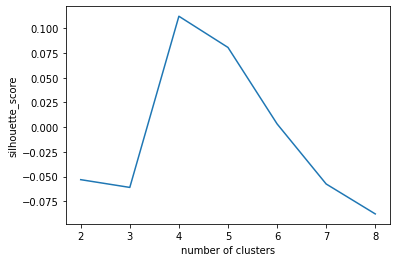

In [19]:
x=range(2,9)
y=silh
plt.plot(x,y)
plt.ylabel('silhouette_score')
plt.xlabel('number of clusters')
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('test_gower_pam_silhouetteNoNoneNOTWEIGHTED_ALLVAR_silhouette_score_1000dpi.pdf',dpi=1000,format='pdf')
plt.show()


In [19]:
km=KMedoids(n_clusters=4, metric='precomputed', max_iter=30000, random_state=None)
km.fit(dm)
km.labels_

array([2, 1, 3, 3, 1, 0, 2, 0, 1, 0, 0])

In [20]:
for nclusters in range(2,9):
    km=KMedoids(n_clusters=nclusters, metric='precomputed', max_iter=30000, random_state=None)
    km.fit(dm)
    print(f'nclusters={nclusters} clustering={km.labels_}')


nclusters=2 clustering=[0 1 0 0 1 0 0 0 0 1 0]
nclusters=3 clustering=[2 1 0 0 1 0 2 0 0 1 0]
nclusters=4 clustering=[2 1 3 3 1 0 2 0 1 0 0]
nclusters=5 clustering=[3 0 2 2 0 1 3 4 1 4 4]
nclusters=6 clustering=[3 0 2 2 5 1 3 4 1 4 4]
nclusters=7 clustering=[3 0 2 2 5 6 3 4 1 6 4]
nclusters=8 clustering=[3 0 2 7 5 6 3 4 1 6 4]


In [21]:
for nclusters in range(2,9):
    km=KMedoids(n_clusters=nclusters, metric='precomputed', max_iter=30000, random_state=None)
    km.fit(dm)
    print(f'nclusters={nclusters} clustering={km.labels_}')

nclusters=2 clustering=[0 1 0 0 1 0 0 0 0 1 0]
nclusters=3 clustering=[2 1 0 0 1 0 2 0 0 1 0]
nclusters=4 clustering=[2 1 3 3 1 0 2 0 1 0 0]
nclusters=5 clustering=[3 0 2 2 0 1 3 4 1 4 4]
nclusters=6 clustering=[3 0 2 2 5 1 3 4 1 4 4]
nclusters=7 clustering=[3 0 2 2 5 6 3 4 1 6 4]
nclusters=8 clustering=[3 0 2 7 5 6 3 4 1 6 4]
